In [5]:
import polars as pl
import matplotlib.pyplot as plt
import math
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

from jormund import *
setup_plots()

import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn

%matplotlib inline

/home/turhantas/myenv/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


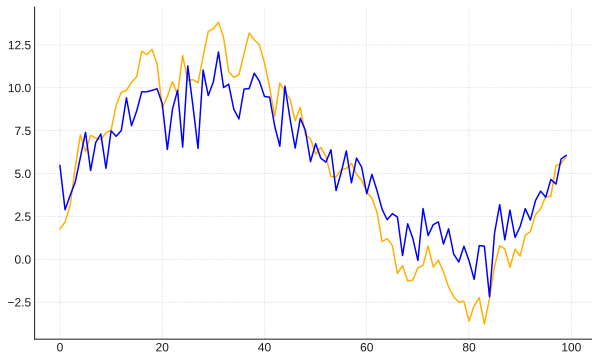

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  100
Model:                 ARIMA(0, 0, 2)   Log Likelihood                -210.954
Date:                Wed, 06 Nov 2024   AIC                            429.908
Time:                        11:26:30   BIC                            440.328
Sample:                             0   HQIC                           434.125
                                - 100                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.4723      0.593      9.236      0.000       4.311       6.634
ma.L1          1.1267      0.066     17.106      0.000       0.998       1.256
ma.L2          0.8358      0.070     11.980      0.0

In [10]:
# Generate synthetic residuals data for a stock price
np.random.seed(0)
errors = np.random.normal(0, 1, 100)
stock_residuals = pd.Series(errors).cumsum()  # cumulative sum to simulate residuals

# Fit MA(2) model (order 0 for AR, 2 for MA)
model_ma = ARIMA(stock_residuals, order=(0, 0, 2))
ma_fit = model_ma.fit()

# Plot original data and forecast
plt.plot(stock_residuals, label="Original Data")
plt.plot(ma_fit.fittedvalues, label="MA(2) Fitted Values", color="blue")
plt.show()

# Display summary
print(ma_fit.summary())